In [7]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
import pickle
import sys
import seaborn as sns
import numpy as np
sys.path.append("C:/Users/msachde1/Downloads/Research/Development/mgwr/notebooks/Poisson_MC_script/")
import f_2
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
mgwr_bw0=[]
mgwr_bw1=[]
mgwr_bw2=[]
gwr_bw=[]

In [11]:
for i in range(0,1000,50):
    p1 = pickle.load( open( "C:/Users/msachde1/Downloads/Research/Development/mgwr/notebooks/Poisson_MC_script/pkls/results-{}-{}.pkl".format(str(i), str(i+50)),"rb") )
    for j in range(50):
        mgwr_bw0.append(p1[j].mgwr_bw[0][0])
        mgwr_bw1.append(p1[j].mgwr_bw[0][1])
        mgwr_bw2.append(p1[j].mgwr_bw[0][2])
        gwr_bw.append(p1[j].gwr_bw[0])

In [21]:
def add(a,b):
    return 1+((1/120)*(a+b))

def con(u,v):
    return (0*(u)*(v))+0.3

def sp(u,v):
    return 1+1/3240*(36-(6-u/2)**2)*(36-(6-v/2)**2)

def med(u,v):
    B = np.zeros((25,25))
    for i in range(25):
        for j in range(25):
            
            if u[i][j]<=8:
                B[i][j]=0.2
            elif u[i][j]>17:
                B[i][j]=0.7
            else:
                B[i][j]=0.5
    return B

In [22]:
x = np.linspace(0, 25, 25)
y = np.linspace(25, 0, 25)
X, Y = np.meshgrid(x, y)

B0=con(X,Y)
#B1=add(X,Y)
B1=sp(X,Y)
B2=med(X,Y)

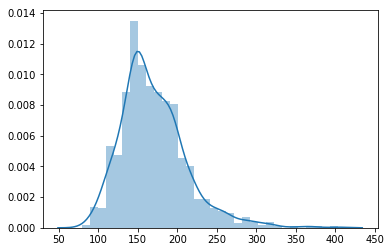

In [23]:
sns.distplot(gwr_bw)

In [24]:
np.mean(gwr_bw)

170.074

([], <a list of 0 Text yticklabel objects>)

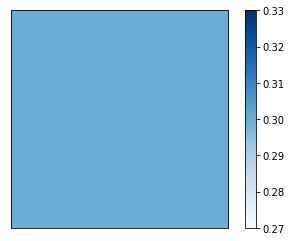

In [25]:
plt.imshow(B0, extent=[0,10, 0, 10], origin='lower',cmap='Blues')
plt.colorbar()
plt.axis(aspect='image')
plt.xticks([])
plt.yticks([])

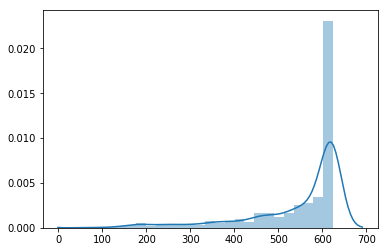

In [26]:
sns.distplot(mgwr_bw0)

In [27]:
np.mean(mgwr_bw0)

546.083

([], <a list of 0 Text yticklabel objects>)

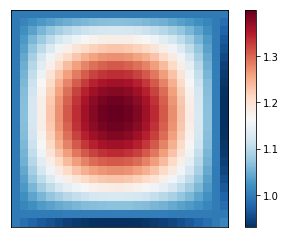

In [28]:
plt.imshow(B1, extent=[0,25, 0, 25], origin='lower',cmap='RdBu_r')
plt.colorbar()
plt.axis(aspect='image')
plt.xticks([])
plt.yticks([])

In [29]:
np.mean(mgwr_bw1)

91.753

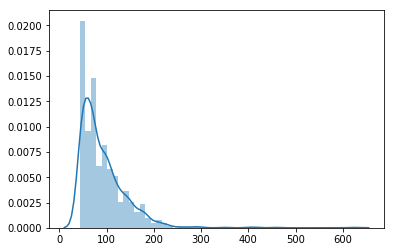

In [30]:
sns.distplot(mgwr_bw1)

([], <a list of 0 Text yticklabel objects>)

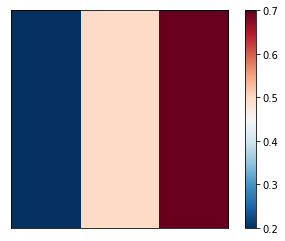

In [31]:
plt.imshow(B2, extent=[0,25, 0, 25], origin='lower',cmap='RdBu_r')
plt.colorbar()
plt.axis(aspect='image')
plt.xticks([])
plt.yticks([])

In [32]:
np.mean(mgwr_bw2)

209.398

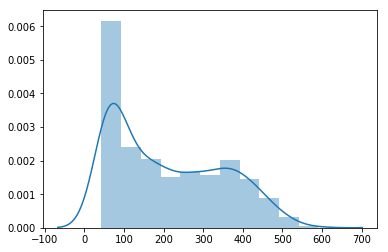

In [33]:
sns.distplot(mgwr_bw2)

In [34]:
np.mean(mgwr_bw0),np.mean(mgwr_bw1),np.mean(mgwr_bw2)

(546.083, 91.753, 209.398)

In [160]:
mgwr_aicc=[]
gwr_aicc=[]
mgwr_bic=[]
gwr_bic=[]
mgwr_aic=[]
gwr_aic=[]
mgwr_params=[]
gwr_params=[]

In [161]:
for i in range(0,1000,50):
    p1 = pickle.load( open( "C:/Users/msachde1/Downloads/Research/Development/mgwr/notebooks/Poisson_MC_script/pkls/results-{}-{}.pkl".format(str(i), str(i+50)),"rb") )
    for j in range(50):
        mgwr_aicc.append(p1[j].mgwr_aicc[0])
        gwr_aicc.append(p1[j].gwr_aicc[0])
        
        mgwr_bic.append(p1[j].mgwr_bic[0])
        gwr_bic.append(p1[j].gwr_bic[0])
        
        mgwr_aic.append(p1[j].mgwr_aic[0])
        gwr_aic.append(p1[j].gwr_aic[0])
        
        mgwr_params.append(p1[j].mgwr_params[0])
        gwr_params.append(p1[j].gwr_params[0])

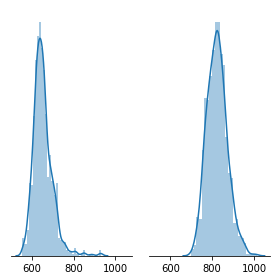

In [48]:
f, axes = plt.subplots(1, 2, figsize=(4, 4), sharex=True)
sns.despine(left=True)
sns.distplot(mgwr_bic,ax=axes[0])
sns.distplot(gwr_bic,ax=axes[1])

plt.setp(axes, yticks=[])
plt.tight_layout()

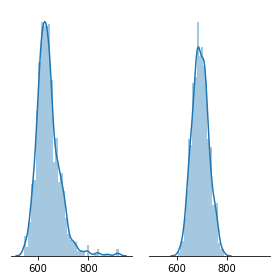

In [47]:
f, axes = plt.subplots(1, 2, figsize=(4, 4), sharex=True)
sns.despine(left=True)
sns.distplot(mgwr_aic,ax=axes[0])
sns.distplot(gwr_aic,ax=axes[1])

plt.setp(axes, yticks=[])
plt.tight_layout()

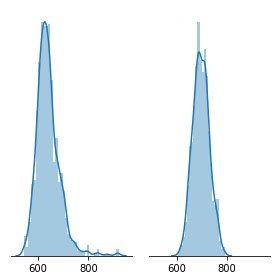

In [46]:
f, axes = plt.subplots(1, 2, figsize=(4, 4), sharex=True)
sns.despine(left=True)
sns.distplot(mgwr_aicc,ax=axes[0])
sns.distplot(gwr_aicc,ax=axes[1])

plt.setp(axes, yticks=[])
plt.tight_layout()

In [49]:
np.mean(mgwr_aicc), np.mean(gwr_aicc)

(640.2736332530651, 696.9264487767485)

In [50]:
np.mean(mgwr_aic), np.mean(gwr_aic)

(640.2353688823071, 693.79977380067)

In [51]:
np.mean(mgwr_bic), np.mean(gwr_bic)

(653.4726886933404, 823.1916659552306)

### Boxplots for comparison

In [149]:
model=[]
model = ['gwr']*1000
model2 = ['mgwr']*1000
model=model+model2

In [163]:
aic=[]
aic=gwr_aic
aic=aic+mgwr_aic

In [168]:
aicc=[]
aicc=gwr_aicc
aicc=aicc+mgwr_aicc

In [169]:
bic=[]
bic=gwr_bic
bic=bic+mgwr_bic

In [170]:
d = {'aic':aic,'bic':bic,'aicc':aicc,'model':model}

In [172]:
df=pd.DataFrame(data=d)

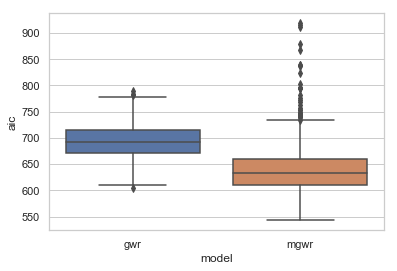

In [174]:
sns.set(style="whitegrid")
ax = sns.boxplot(y=df['aic'],x=df['model'])

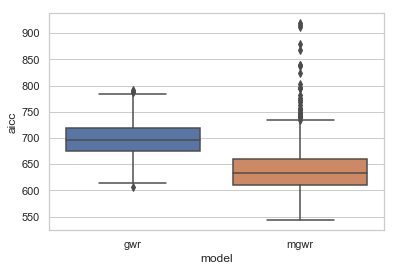

In [175]:
sns.set(style="whitegrid")
ax = sns.boxplot(y=df['aicc'],x=df['model'])

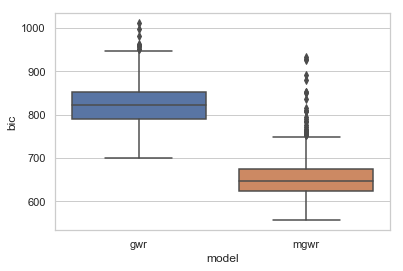

In [176]:
sns.set(style="whitegrid")
ax = sns.boxplot(y=df['bic'],x=df['model'])